# Fourier Analysis

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sympy import *
from ipywidgets import interact, fixed
from IPython.display import display

In [2]:
init_session()

IPython console for SymPy 1.0 (Python 2.7.12-32-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [3]:
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 18
rcParams['axes.titlesize'] = 20

## Fourier Series

### An example

In [4]:
from scipy.special import j1

In [5]:
def waves(N=10, f=1, wtype='square'):
    t = np.linspace(0, 2, 1000)
    x = np.zeros_like(t)
   
    for k in range(1, N+1):
        if wtype=='square':
            x = x + 4/np.pi*np.sin(2*np.pi*(2*k - 1)*f*t)/(2*k-1)
        if wtype=='sawtooth':
            x = x + 2*(-1)**(k+1)/np.pi*np.sin(2*np.pi*k*f*t)/k
        if wtype=='triangle':
            n = k - 1
            x = x + 8/np.pi**2*(-1)**n*np.sin(2*np.pi*(2*n + 1)*f*t)/(2*n +1)**2
        if wtype=='circ':
            n = k - 1
            if n == 0:
                x = x + 0.25*np.pi
            else:
                x = x + (-1)**n*j1(n*np.pi)/n*np.cos(2*np.pi*n*f*t)
    
    plt.subplots(figsize=(8,4))
    plt.plot(t, x, lw=2)
    plt.ylim(-1.5, 1.5)

<IPython.core.display.Javascript object>


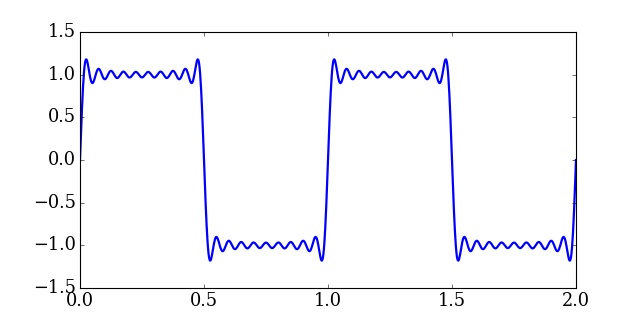

In [6]:
w = interact(waves,
             N=(1,400),
             f=(1.,10.),
             wtype=('square','sawtooth','triangle','circ'))

## Using Sympy

In [7]:
def fourier(fun, approx_fun, half_width=pi, n=5):
    fun_np = lambdify((x), fun, "numpy")
    approx_np = lambdify((x), approx_fun.truncate(n), "numpy")
    x_np = np.linspace(-float(half_width), float(half_width), 201)
    
    plt.subplots(figsize=(8,4))
    plt.plot(x_np, fun_np(x_np), color="blue", linewidth=2,
             label="Function")
    plt.plot(x_np, approx_np(x_np), color="black", linestyle="dashed",
             linewidth=2, label="Approximation")
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

In [8]:
fun = x**2
approx_fun = fourier_series(x**2, (x, -pi, pi))

<IPython.core.display.Javascript object>


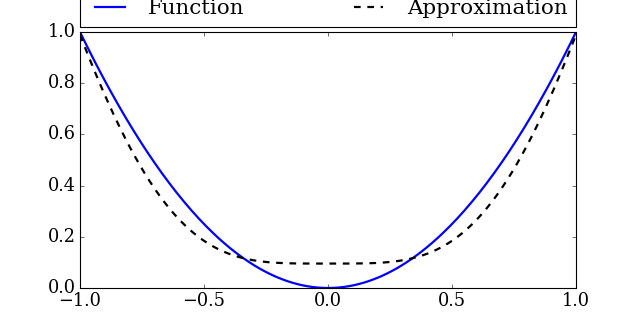

<function __main__.fourier>

In [9]:
interact(fourier,
         fun=fixed(fun),
         approx_fun=fixed(approx_fun),
         half_width=fixed(1),
         n=(1, 50))

## Fourier transforms

In [10]:
f = exp(-x**2)
F = fourier_transform(f, x, y)
F

Let's compute the Fourier transform of a square function

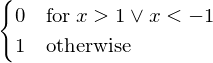

In [20]:
square

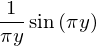

In [23]:
square = Piecewise((0, x<-S(1)/2), (0, x>S(1)/2), (1, True))
T_square = fourier_transform(square, x, y)
T_square = simplify(T_square.rewrite(sin))
T_square

<IPython.core.display.Javascript object>


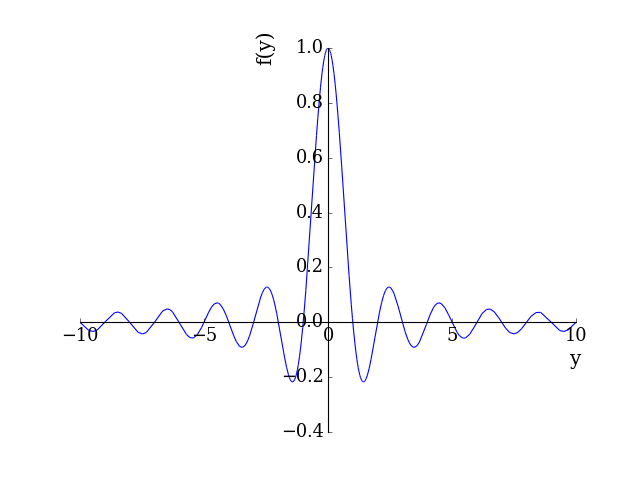

In [24]:
plot(T_square)

In [28]:
y = symbols("y", nonzero=True)
FT = integrate(exp(-2*pi*I*x*y), (x, -S(1)/2, S(1)/2))

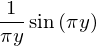

In [29]:
FT = simplify(FT.rewrite(sin))
FT

<IPython.core.display.Javascript object>


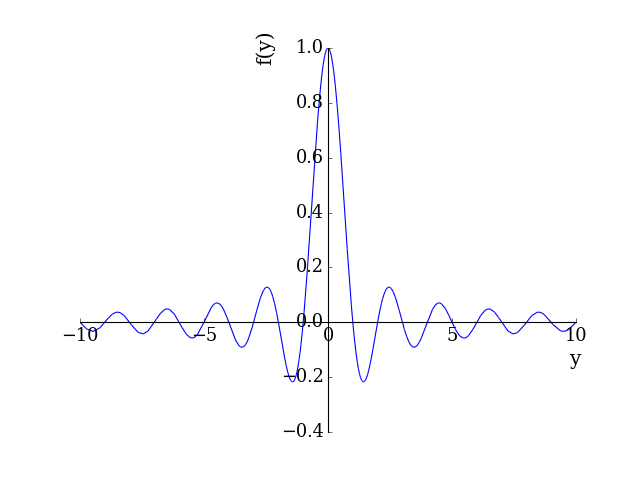

In [30]:
plot(FT)

In [14]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()